In [283]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import griddata

<h2>Блок 1. Подготовка данных.</h2> 

In [284]:
df_speed = pd.read_csv('wind_speed.csv')
df_temperature = pd.read_csv('temperature.csv')
df_cities = pd.read_csv('city_attributes.csv')
df_wind_direction = pd.read_csv('wind_direction.csv')
df_weather_description = pd.read_csv('weather_description.csv')

In [285]:
df_speed = df_speed.drop('datetime', axis=1)
df_wind_direction = df_wind_direction.drop('datetime', axis=1)
df = pd.concat([df_temperature, df_speed, df_wind_direction], axis=1)
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.0,NaN,300.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,290.0,NaN,300.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,320.0,NaN,290.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,330.0,NaN,290.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       ...
       'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba',
       'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem'],
      dtype='object', length=109)

In [287]:
df = df[df.isnull().sum(axis=1)==0].copy() # удаляем строки с пустотами 

In [288]:
df['mean_temperature'] = df.iloc[:, 1:37].mean(axis=1) # средняя температура в городах в данный момент времени 

In [289]:
df['mean_speed'] = df.iloc[:, 37:73].mean(axis=1) # средняя скорость ветра в городах в данных момент времени 

In [290]:
# Стандартное отклонение температур по городам в каждый час - хороший показатель градиента
df['temp_gradient'] = df.iloc[:, 1:37].std(axis=1)

<hr>

<h2>Блок 2. Задания 1-3.</h2>

<h3>Задание 1. Постройте зависимость ветра от температуры. Рассчитайте, как изменяется скорость ветра при изменении температуры. Свяжите результат с прогнозом погоды</h3>

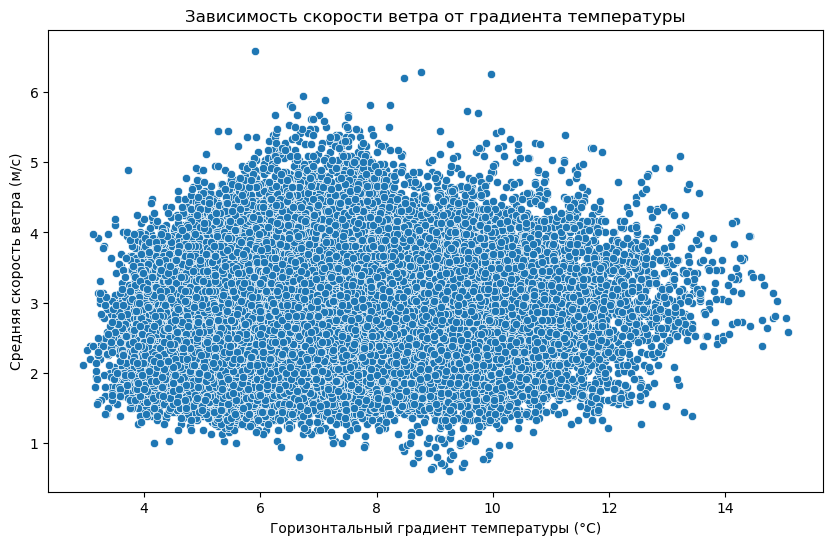

Уравнение регрессии: Скорость_ветра = 0.057 * Градиент_температуры + 2.391
R^2: 0.021


In [291]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="temp_gradient", y="mean_speed")
plt.xlabel('Горизонтальный градиент температуры (°C)')
plt.ylabel('Средняя скорость ветра (м/с)')
plt.title('Зависимость скорости ветра от градиента температуры')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['temp_gradient'], df['mean_speed']
)
print(f'Уравнение регрессии: Скорость_ветра = {slope:.3f} * Градиент_температуры + {intercept:.3f}')
print(f'R^2: {r_value**2:.3f}')

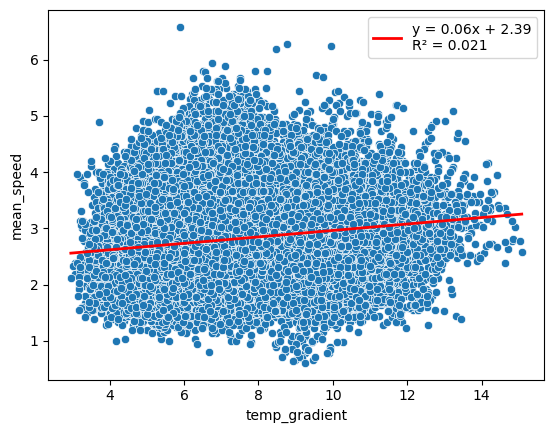

In [292]:
sns.scatterplot(data=df, x="temp_gradient", y="mean_speed") 

x_line = np.linspace(df['temp_gradient'].min(), df['temp_gradient'].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, 
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}')

plt.legend()
plt.show()

Была исследована зависимость скорости ветра от температуры. Прямая зависимость средней скорости ветра от средней температуры по региону может вводить в заблуждение, так как сильно зависит от сезонных факторов. Физически обоснованной является связь скорости ветра с горизонтальным градиентом температуры (разницей температур между пунктами), так как именно этот градиент является индикатором барического градиента — основной силы, вызывающей ветер. Рассчитанная регрессия между градиентом температуры и скоростью ветра показывает что при увеличении градиента температуры на 1°C скорость ветра в среднем возрастает на 0.06 м/с

<hr>

<h3>Задание 2. Рассчитайте градиент температуры по координатам (∂T/∂lat, ∂T/∂lon) для каждой точки. Какая польза от этого для прогнозов?</h3>


In [293]:
mean_temperatures = df.iloc[:, 1:37].mean().reset_index(name='mean_temperature')['mean_temperature'].copy()

In [294]:
df_cities = pd.concat([df_cities, mean_temperatures], axis=1)
df_cities

,City,Country,Latitude,Longitude,mean_temperature
0,Vancouver,Canada,49.249660,-123.119339,283.862923
1,Portland,United States,45.523449,-122.676208,285.050325
2,San Francisco,United States,37.774929,-122.419418,288.156970
3,Seattle,United States,47.606209,-122.332069,284.474498
4,Los Angeles,United States,34.052231,-118.243683,290.841609
5,San Diego,United States,32.715328,-117.157257,290.215650
6,Las Vegas,United States,36.174969,-115.137222,292.477276
7,Phoenix,United States,33.448380,-112.074043,295.533662
8,Albuquerque,United States,35.084492,-106.651138,285.669888
9,Denver,United States,39.739151,-104.984703,282.892921


Выполняем интерполяцию функции температуры по известным точкам, так как нам нужно добиться непрерывности функции. 

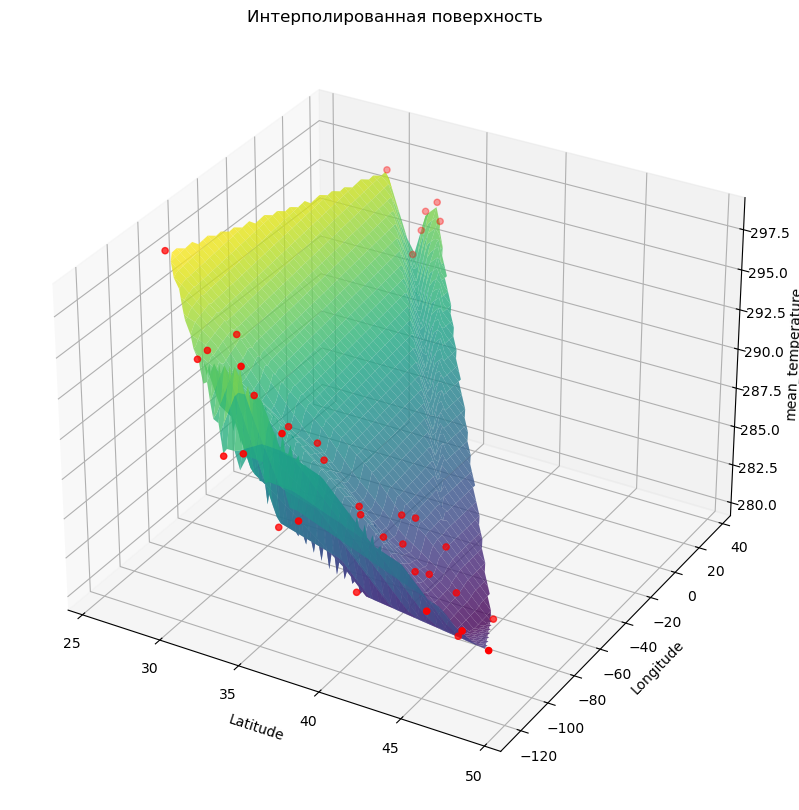

In [295]:
xi = np.linspace(df_cities['Latitude'].min(), df_cities['Latitude'].max(), 100)
yi = np.linspace(df_cities['Longitude'].min(), df_cities['Longitude'].max(), 100)
XI, YI = np.meshgrid(xi, yi)

ZI = griddata((df_cities['Latitude'], df_cities['Longitude']), df_cities['mean_temperature'], (XI, YI), method='linear')

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XI, YI, ZI, cmap='viridis', alpha=0.8)
ax.scatter(df_cities['Latitude'], df_cities['Longitude'], df_cities['mean_temperature'], color='red', s=20)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('mean_temperature')
ax.set_title('Интерполированная поверхность')
plt.show()

Вычисляем градиент для каждой известной точки. 

In [296]:
grad_y, grad_x = np.gradient(ZI, yi, xi)  

gradients = []
for i, row in df_cities.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    
    lat_idx = np.argmin(np.abs(xi - lat))
    lon_idx = np.argmin(np.abs(yi - lon))
    
    grad_lat = grad_x[lon_idx, lat_idx] 
    grad_lon = grad_y[lon_idx, lat_idx]   
    
    gradients.append({
        'grad_latitude': grad_lat,
        'grad_longitude': grad_lon,
        'grad_module': np.sqrt(grad_lat**2 + grad_lon**2),
    })

df_cities_with_gradients = pd.concat([df_cities, pd.DataFrame(gradients)], axis=1)
df_cities_with_gradients

,City,Country,Latitude,Longitude,mean_temperature,grad_latitude,grad_longitude,grad_module
0,Vancouver,Canada,49.249660,-123.119339,283.862923,NaN,NaN,NaN
1,Portland,United States,45.523449,-122.676208,285.050325,NaN,NaN,NaN
2,San Francisco,United States,37.774929,-122.419418,288.156970,NaN,NaN,NaN
3,Seattle,United States,47.606209,-122.332069,284.474498,NaN,NaN,NaN
4,Los Angeles,United States,34.052231,-118.243683,290.841609,2.130467,NaN,NaN
5,San Diego,United States,32.715328,-117.157257,290.215650,NaN,NaN,NaN
6,Las Vegas,United States,36.174969,-115.137222,292.477276,-0.632904,-0.140339,0.648277
7,Phoenix,United States,33.448380,-112.074043,295.533662,0.500143,0.020848,0.500577
8,Albuquerque,United States,35.084492,-106.651138,285.669888,-2.021603,-0.569978,2.100418
9,Denver,United States,39.739151,-104.984703,282.892921,-1.006637,-0.282293,1.045469


В некоторых точках градиент функции неопределен, что связано с методами линейной интерполяции и вычисления производной.  np.gradient для граничных точек вычисляет частные производные по определению через предел преращения lim(f(x+delta)-f(x)/delta), но f(x+delta) будет неопределена, поэтому в конечном итоге будет NaN. 

<h3>Какая польза от этого для прогнозов?</h3>

<ul>
    <li>
        <p>Создание "температурной карты" описывает зависимость степени нагрева Земной поверхности солнцем от расположения на поверхности</p>
    </li>
    <li>
        <p>Направление градиента может показывать, траекторию движения теплых воздушных масс</p>
    </li>
    <li>
        <p>
            Модуль градиента может помочь индентифицировать положение атмосферного фронта - точки, где пересекаются теплые и холодные воздушные массы
        </p>
    </li>
</ul>


<hr>
<h3>
    Задание 3. Перейдите к сферическим координатам (радиус ≈ земной радиус, θ = широта, φ = долгота) и пересчитайте компоненты ветра в этих координатах. Сравните два представления информации
</h3>

Определим вспомогательные функции для пересчёта линейных компонент скорости ветра в сферических (угловая скорость):

In [297]:
def dec_wind_components(angle, speed):
    
    angle_rad = np.radians(angle - 90)
    speed_x = speed * np.cos(angle_rad)
    speed_y = speed * np.sin(angle_rad)
    
    return [speed_x, speed_y]
    
def sphere_wind_components(angle, speed, latitude, R = 6371000):
    
    latitude_rad = np.radians(latitude)
    
    speed_x = dec_wind_components(angle, speed)[0]
    speed_y = dec_wind_components(angle, speed)[1]
    
    w_lat = speed_y / R
    w_long = speed_x / (R * np.cos(latitude_rad))
    
    return np.sqrt(w_lat**2 + w_long**2)


Создадим вспомогательный датафрейм с широтами для каждого города:

In [298]:
latitudes = df_cities['Latitude'].tolist()

n_rows = 44386
n_cities = 36

latitudes_array = np.tile(latitudes, (n_rows, 1))

result_df = pd.DataFrame(latitudes_array)

result_df.columns = [f'Latitude_city_{i+1}' for i in range(n_cities)]

result_df

,Latitude_city_1,Latitude_city_2,Latitude_city_3,Latitude_city_4,Latitude_city_5,Latitude_city_6,Latitude_city_7,Latitude_city_8,Latitude_city_9,Latitude_city_10,...,Latitude_city_27,Latitude_city_28,Latitude_city_29,Latitude_city_30,Latitude_city_31,Latitude_city_32,Latitude_city_33,Latitude_city_34,Latitude_city_35,Latitude_city_36
0,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
1,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
2,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
3,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
4,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44381,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
44382,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
44383,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039
44384,49.24966,45.523449,37.774929,47.606209,34.052231,32.715328,36.174969,33.44838,35.084492,39.739151,...,39.952339,40.714272,45.508839,42.358429,31.25181,32.083328,29.55805,32.815559,33.005859,31.769039


Соединим наш основной датафрейм со вспомогательным:

In [299]:
df_reset = df.copy().reset_index(drop=True)
result_df_reset = result_df.copy().reset_index(drop=True)
df = pd.concat([df_reset, result_df_reset], axis=1)
df.shape

(44386, 148)

Еще одна вспомогательная функция для пересчёта скорости:

In [300]:
def process_row_by_position(row):

    row_values = row.tolist()
    
    speed_values = row_values[37:73]
    direction_values = row_values[73:109]
    latitude_values = row_values[112:]
    
    results = []
    for direction, speed, latitude in zip(direction_values, speed_values, latitude_values):
        
        result = sphere_wind_components(direction, speed, latitude) 
        results.append(result)
    
    return results

In [301]:
results = df.apply(process_row_by_position, axis=1, result_type='expand')

results.columns = [f'angle_speed_city_{i+1}' for i in range(len(results.columns))]

In [302]:
results

,angle_speed_city_1,angle_speed_city_2,angle_speed_city_3,angle_speed_city_4,angle_speed_city_5,angle_speed_city_6,angle_speed_city_7,angle_speed_city_8,angle_speed_city_9,angle_speed_city_10,...,angle_speed_city_27,angle_speed_city_28,angle_speed_city_29,angle_speed_city_30,angle_speed_city_31,angle_speed_city_32,angle_speed_city_33,angle_speed_city_34,angle_speed_city_35,angle_speed_city_36
0,0.000000e+00,0.000000,3.366660e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.159811e-07,6.278449e-07,6.527330e-07,...,8.190219e-07,1.440235e-06,7.961623e-07,5.999895e-07,1.708023e-07,0.000000e+00,1.305195e-06,3.245404e-07,3.246936e-07,3.295035e-07
1,0.000000e+00,0.000000,3.407403e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.155942e-07,6.278449e-07,6.575887e-07,...,8.190219e-07,1.440235e-06,7.961623e-07,5.999895e-07,4.839404e-07,0.000000e+00,1.305195e-06,3.245404e-07,3.246936e-07,3.295035e-07
2,0.000000e+00,0.000000,3.492676e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.155942e-07,6.278449e-07,5.122350e-07,...,6.142279e-07,1.440235e-06,8.005447e-07,5.999895e-07,4.839404e-07,0.000000e+00,1.305195e-06,3.245404e-07,3.246936e-07,3.295035e-07
3,0.000000e+00,0.000000,3.579674e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.155942e-07,6.278449e-07,5.314391e-07,...,6.141122e-07,1.440235e-06,8.091372e-07,5.999895e-07,4.839404e-07,0.000000e+00,1.305195e-06,3.245404e-07,3.246936e-07,3.295035e-07
4,0.000000e+00,0.000000,3.664608e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.152464e-07,6.278449e-07,5.510941e-07,...,6.136499e-07,1.235998e-06,6.100040e-07,6.022832e-07,4.839404e-07,0.000000e+00,1.305195e-06,3.245404e-07,3.246936e-07,3.295035e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44381,4.767332e-07,0.000001,0.000000e+00,3.839299e-07,0.000000e+00,5.094454e-07,3.715721e-07,3.410507e-07,1.589085e-07,1.934119e-07,...,6.344525e-07,4.708837e-07,7.502991e-07,1.569612e-07,1.576669e-07,1.569612e-07,4.708837e-07,5.066349e-07,5.071406e-07,1.569612e-07
44382,3.377480e-07,0.000002,3.139225e-07,6.757627e-07,1.885483e-07,5.388432e-07,3.585521e-07,3.616633e-07,1.589085e-07,3.783230e-07,...,6.344525e-07,1.569612e-07,5.283645e-07,1.569612e-07,1.576669e-07,1.569612e-07,7.994328e-07,5.066349e-07,5.071406e-07,1.569612e-07
44383,8.901560e-07,0.000002,3.139225e-07,1.569612e-07,3.160769e-07,4.945755e-07,3.715721e-07,3.410507e-07,1.782409e-07,4.082414e-07,...,4.898288e-07,3.226332e-07,3.522430e-07,4.144788e-07,1.576669e-07,1.569612e-07,7.994328e-07,5.066349e-07,5.071406e-07,1.569612e-07
44384,0.000000e+00,0.000001,3.780706e-07,6.490496e-07,3.139225e-07,7.184576e-07,3.598164e-07,3.139225e-07,1.908547e-07,2.041207e-07,...,3.265525e-07,4.751315e-07,1.990406e-07,1.569612e-07,1.613135e-07,4.934737e-07,1.598866e-07,1.832092e-07,1.835663e-07,4.929404e-07


In [303]:
df = pd.concat([df, results], axis=1)
df.shape

(44386, 184)

Сравним 2 представления скоростей на примере одного города:

In [304]:
df_compare = pd.concat([df.iloc[:, 37], df.iloc[:, 148]], axis=1)
df_compare

,Vancouver,angle_speed_city_1
0,0.0,0.000000e+00
1,0.0,0.000000e+00
2,0.0,0.000000e+00
3,0.0,0.000000e+00
4,0.0,0.000000e+00
...,...,...
44381,2.0,4.767332e-07
44382,2.0,3.377480e-07
44383,4.0,8.901560e-07
44384,0.0,0.000000e+00


In [305]:
df_compare = pd.concat([df.iloc[:, 37], df.iloc[:, 41], df.iloc[:, 148], df.iloc[:, 152], df.iloc[:, 73].rename('Direction_1'), df.iloc[:, 78].rename('Direction_2')], axis=1)
df_compare[(df_compare['Vancouver'] == 2)&(df_compare['Los Angeles'] == 2)]

,Vancouver,Los Angeles,angle_speed_city_1,angle_speed_city_5,Direction_1,Direction_2
128,2.0,2.0,3.446900e-07,3.139225e-07,337.0,290.0
198,2.0,2.0,4.644894e-07,3.334476e-07,290.0,0.0
200,2.0,2.0,4.450780e-07,3.637392e-07,300.0,290.0
294,2.0,2.0,4.767332e-07,3.770967e-07,80.0,200.0
299,2.0,2.0,4.767332e-07,3.788920e-07,80.0,310.0
...,...,...,...,...,...,...
44300,2.0,2.0,3.139225e-07,3.388949e-07,360.0,20.0
44302,2.0,2.0,4.767332e-07,3.388949e-07,100.0,20.0
44304,2.0,2.0,3.858199e-07,3.355926e-07,38.0,340.0
44309,2.0,2.0,3.377480e-07,3.139225e-07,340.0,330.0


Перейдя к сферическим координатам и угловому представлению скорости ветра, стало ясно, что из-за кривизны поверхности Земли, города на бОльших широтах имеют бОльшую угловую скорость ветра. Доказательством этому служит сравнение сверху. Это объясняет, почему циклоны на разных широтах имеют разную угловую скорость 

